Local version adapted from https://www.kaggle.com/code/ryanholbrook/custom-convnets/tutorial#Your-Turn

In [5]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [7]:

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    './dataset/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    './dataset/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

# Trains about 60 min, to 84%
model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),


    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       1

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

In [11]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

Epoch 1/50
80/80 [==============================] - 83s 1s/step - loss: 0.6784 - binary_accuracy: 0.5714 - val_loss: 0.6665 - val_binary_accuracy: 0.5785
Epoch 2/50
80/80 [==============================] - 79s 995ms/step - loss: 0.6659 - binary_accuracy: 0.5787 - val_loss: 0.6578 - val_binary_accuracy: 0.5785
Epoch 3/50
80/80 [==============================] - 77s 970ms/step - loss: 0.6619 - binary_accuracy: 0.5787 - val_loss: 0.6524 - val_binary_accuracy: 0.5785
Epoch 4/50
80/80 [==============================] - 74s 932ms/step - loss: 0.6574 - binary_accuracy: 0.5787 - val_loss: 0.6469 - val_binary_accuracy: 0.5785
Epoch 5/50
80/80 [==============================] - 69s 867ms/step - loss: 0.6486 - binary_accuracy: 0.5816 - val_loss: 0.6420 - val_binary_accuracy: 0.5838
Epoch 6/50
80/80 [==============================] - 70s 873ms/step - loss: 0.6368 - binary_accuracy: 0.6342 - val_loss: 0.6335 - val_binary_accuracy: 0.6122
Epoch 7/50
80/80 [==============================] - 69s 866ms

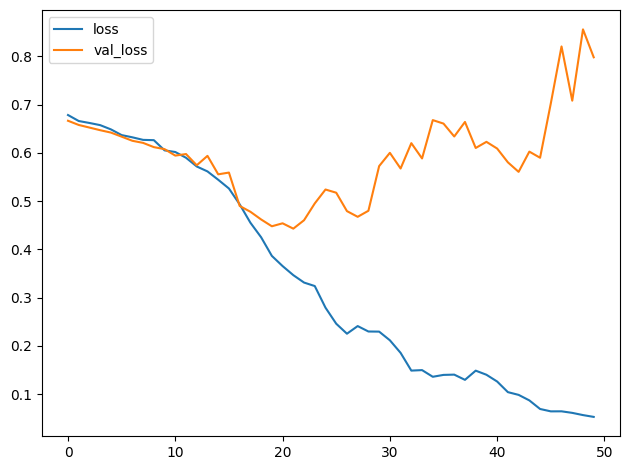

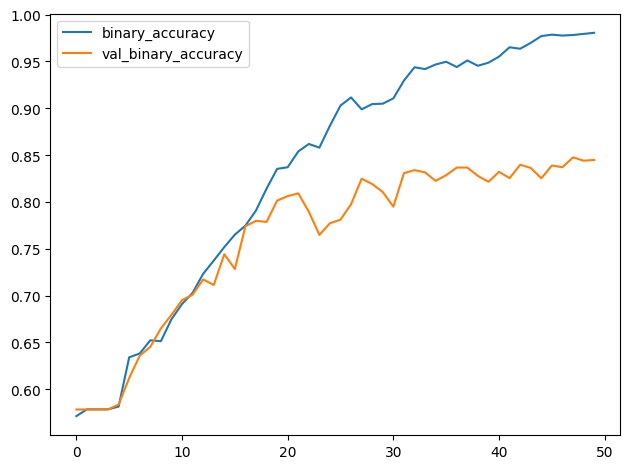

In [13]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [14]:
# Quick model, trains in about 20 mins, 79% acc
quick_model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),


    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

In [15]:
quick_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)       

In [16]:
quick_model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

quick_history = quick_model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

Epoch 1/50
80/80 [==============================] - 27s 325ms/step - loss: 0.6861 - binary_accuracy: 0.5611 - val_loss: 0.6785 - val_binary_accuracy: 0.5785
Epoch 2/50
80/80 [==============================] - 25s 314ms/step - loss: 0.6752 - binary_accuracy: 0.5787 - val_loss: 0.6657 - val_binary_accuracy: 0.5785
Epoch 3/50
80/80 [==============================] - 25s 319ms/step - loss: 0.6657 - binary_accuracy: 0.5830 - val_loss: 0.6591 - val_binary_accuracy: 0.5957
Epoch 4/50
80/80 [==============================] - 25s 315ms/step - loss: 0.6642 - binary_accuracy: 0.5921 - val_loss: 0.6546 - val_binary_accuracy: 0.6230
Epoch 5/50
80/80 [==============================] - 26s 326ms/step - loss: 0.6567 - binary_accuracy: 0.6054 - val_loss: 0.6475 - val_binary_accuracy: 0.6329
Epoch 6/50
80/80 [==============================] - 25s 315ms/step - loss: 0.6531 - binary_accuracy: 0.6090 - val_loss: 0.6419 - val_binary_accuracy: 0.6225
Epoch 7/50
80/80 [==============================] - 25s 31